In [1]:
from decimal import Decimal

from tools.pancake.lib.cex import Cex
from tools.pancake.lib.dex import Dex
from tools.pancake.lib.execution import Execution

from tools.pancake.lib.constants import KEY, CASE_1, CASE_2
from loguru import logger
from deepmerge import Merger
from tools.pancake.lib.chain_config import get_config

In [2]:
%load_ext lab_black

In [3]:
config = {}

merger = Merger([(list, "override"), (dict, "merge")], ["override"], ["override"])
for add in ["config.yaml", "yaml/bot/spread_arbitrage.yaml", "secrets.yaml"]:
    config = merger.merge(config, get_config("/Users/mdarblade/code/bhft/" + add))

TODO:
- [X] Add lock file for already executed pairs
- [ ] Need to add local nonce update

In [4]:
self = Execution(config)

In [ ]:
report = {
            "capital": Decimal("0.1"),
            "pair": "XVS-BNB",
            "case": Case.ONE,
            "steps": {
                "1. we_got_base": Decimal("8.079189438215428449522425809"),
                "2. we_received_on_bidask": Decimal("8.079189438215428449522425809"),
                "3. we_got_quote": Decimal("0.5000746963074014936167046613"),
                "4. output": Decimal("0.5000746963074014936167046613"),
            },
            "roc": Decimal("0.000149392614802987233409323"),
        }

In [ ]:
self.test_report_case_1()

In [ ]:
"BNB"->XVS

In [ ]:
CEX : sell atom -> BNB. BNB (binance)

In [ ]:
(dex): 

In [ ]:
  "ATOM-BNB": {
    "base_asset": "ATOM",
    "quote_asset": "BNB",
    "symbol": "ATOMBNB",
    "inverted": false,
    "tick_size": "0.00001000",
    "min_qty": "0.01000000",
    "base_address": "0x0Eb3a705fc54725037CC9e008bDede697f62F335",
    "quote_address": "0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c",
    "base_decimals": 18,
    "quote_decimals": 18,
    "pool": "0x468b2DC8DC75990eE3E9dc0648965Ad6294E7914",
    "pool_inverted": false
  },

In [ ]:
report = {
            "capital": Decimal(".1"),
            "pair": "ATOM-BNB",
            "case": Case.TWO,
            "steps": {
                "1. we_got_base": Decimal("26.20427428871115772912023076"),
                "2. we_received_on_xyk": Decimal("26.20427428871115772912023076"),
                "3. we_got_quote": Decimal("2.002711259120943062560158335"),
                "4. output": Decimal("2.002711259120943062560158335"),
            },
            "roc": Decimal("0.001355629560471531280079168"),
        }

In [16]:
self.dex.reference

KeyError: 'ATOMBNB'

In [8]:
self.dex.get_token_contract("BNB").functions.symbol().call()

'WBNB'

In [17]:
self.dex.swap("BNB", "ATOM", 0.05)

In [23]:
pwd

'/Users/mdarblade/code/bhft'

In [26]:
import os, json


def load_json(filepath):
    full_path = os.path.join(f"tools/pancake/data/bakery/{filepath}",)
    with open(full_path, "r") as fp:
        return json.load(fp)

In [27]:
pair_abi = load_json("pair_abi.json")

In [31]:
token_abi = load_json("token_abi.json")

In [40]:
pair_contract = self.dex.web3.eth.contract(
    address=Web3.toChecksumAddress("0x468b2DC8DC75990eE3E9dc0648965Ad6294E7914"),
    abi=pair_abi,
)

In [41]:
self.dex.web3.eth.contract(
    address=Web3.toChecksumAddress(pair_contract.functions.token0().call()),
    abi=pair_abi,
).functions.name().call(), self.dex.web3.eth.contract(
    address=Web3.toChecksumAddress(pair_contract.functions.token1().call()),
    abi=pair_abi,
).functions.name().call()

('Cosmos Token', 'Wrapped BNB')

In [42]:
pair_contract.functions.getReserves().call()

[12718089635134705281265, 899317908430374012800, 1634315810]

In [43]:
str(round(12718089635134705281265e-18, 2)) + " ATOM", str(
    round(899317908430374012800e-18, 2)
) + " BNB"

('12718.09 ATOM', '899.32 BNB')

In [ ]:
self.dex.web3.

In [5]:
self.test_report_case_2()

2021-10-15 18:11:41.860 | WARNING  | tools.pancake.lib.execution:execute:118 - Starting execution.
2021-10-15 18:11:46.987 | WARNING  | tools.pancake.lib.execution:handle_report:27 - Executed 'Sell base for product on CEX': 2.35 CAKE in 5.13 seconds . Expected: 26.2043 (-9103.2 bp)


AttributeError: 'NoneType' object has no attribute 'functions'

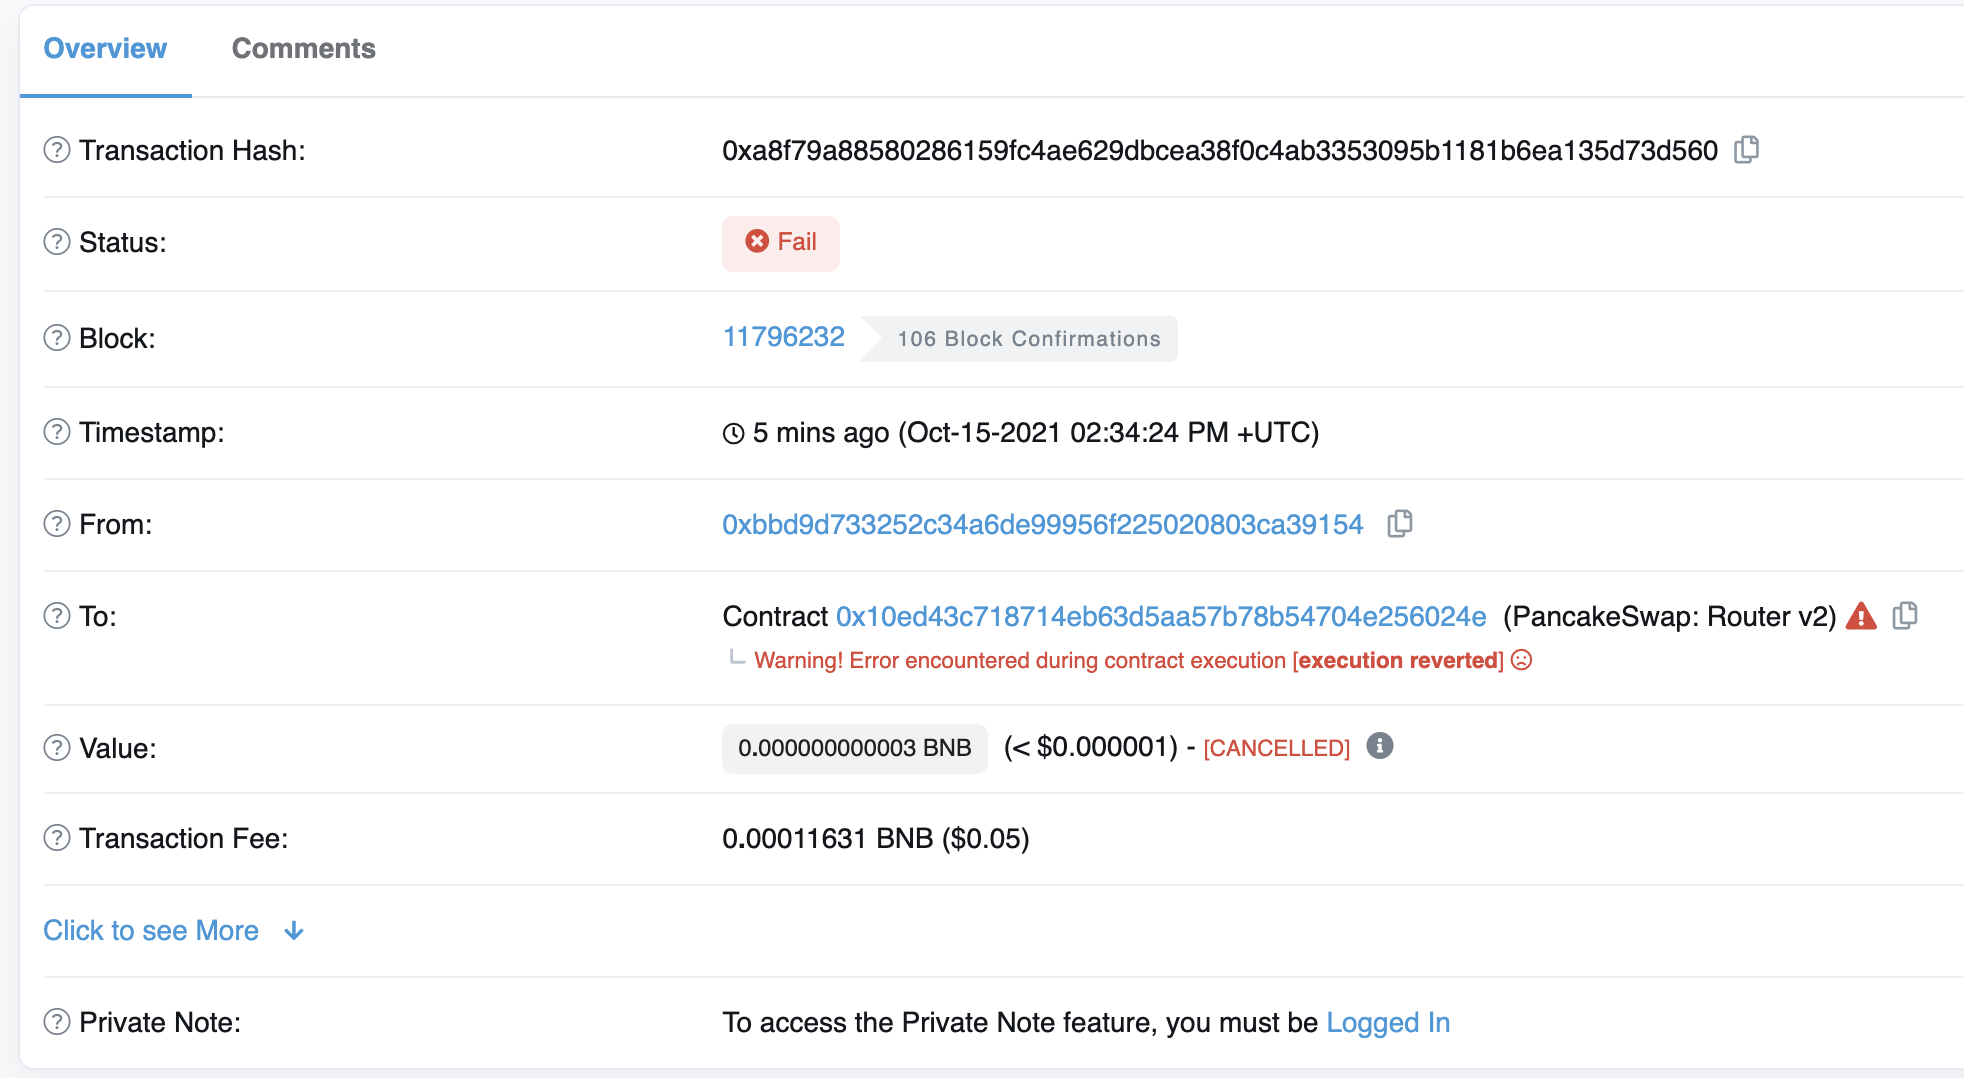

In [ ]:
# Atom -> BNB swap not working

In [11]:
from web3 import Web3
import datetime
from tools.pancake.lib.constants import CONSTANTS, KEY, ExecutionReport
from tools.pancake.lib.venue.pancake import PANCAKE_ROUTER

token_from = "ATOM"
token_to = "BNB"

amount = 0.5

if "-".join([token_from, token_to]) in self.dex.reference:
    ref = self.dex.reference["-".join([token_from, token_to])]
    fromToken, toToken = (
        Web3.toChecksumAddress(ref["base_address"]),
        Web3.toChecksumAddress(ref["quote_address"]),
    )

elif "-".join([token_to, token_from]) in self.dex.reference:
    ref = self.dex.reference["-".join([token_to, token_from])]
    fromToken, toToken = (
        Web3.toChecksumAddress(ref["quote_address"]),
        Web3.toChecksumAddress(ref["base_address"]),
    )

In [12]:
fromToken, toToken

('0x0Eb3a705fc54725037CC9e008bDede697f62F335',
 '0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c')

In [13]:
transferAmount = Web3.toWei(amount, "ether")
amountsOut = self.dex.router.functions.getAmountsOut(
    transferAmount, [fromToken, toToken]
).call()
amountOutMin = amountsOut[1] * (100 - self.dex.slippage_max) / 100
deadline = datetime.datetime.now(datetime.timezone.utc).timestamp() + (
    CONSTANTS.TIMEOUT_MINUTES * 60
)

In [14]:
swap_abi = ""
if token_to == "BNB":
    swap_abi = self.dex.router.encodeABI(
        "swapExactTokensForTokens",
        args=[
            int(transferAmount),
            int(amountOutMin),
            [fromToken, toToken],
            self.dex._address,
            int(deadline),
        ],
    )

rawTransaction = {
    "from": self.dex._address,
    "nonce": self.dex.web3.toHex(
        self.dex.web3.eth.getTransactionCount(self.dex._address)
    ),
    "gasPrice": Web3.toHex(int(self.dex.gas_price * 1e9)),
    "gas": Web3.toHex(self.dex.gas_limit),
    "to": PANCAKE_ROUTER,
    "data": swap_abi,
    "chainId": hex(56),
    "value": Web3.toHex(self.dex.gas_limit)
    if token_to == "BNB"
    else Web3.toHex(transferAmount),
}

rawTransaction

signedTx = self.dex.web3.eth.account.sign_transaction(rawTransaction, self.dex._secret)
deploy_txn = self.dex.web3.eth.send_raw_transaction(signedTx.rawTransaction)
_ = self.dex.web3.eth.wait_for_transaction_receipt(deploy_txn)

_

AttributeDict({'blockHash': HexBytes('0xc07a288c82aa6c8c8c1d8b1b35d85e245f5e127a6ae90f7f9a72cfd764e317f9'),
 'blockNumber': 11798311,
 'contractAddress': None,
 'cumulativeGasUsed': 11545840,
 'from': '0xBBd9D733252C34a6dE99956f225020803ca39154',
 'gasUsed': 23237,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 0,
 'to': '0x10ED43C718714eb63d5aA57B78B54704E256024E',
 'transactionHash': HexBytes('0x77c403baf475653fd3f90daaee1e15de01b63997b63410133654ff758434c0ba'),
 'transactio

## Market order

In [ ]:
quote_order_quantity = None

quantity = int(quantity * 10 ** CONSTANTS.PRECISION) * 10 ** (
    -CONSTANTS.PRECISION
)

if coin_from + coin_to in self.dex.reference:
    # base to quote.
    market_pair = coin_from + coin_to
    quantity *= -1

elif coin_to + coin_from in self.dex.reference:
    # quote to base
    market_pair = coin_to + coin_from
    quote_order_quantity = quantity

min_qty = self.dex.reference[market_pair][KEY.MIN_QTY]
report = ExecutionReport()
report.SYMBOL = coin_to

original_qty = self.dex.getWallet()[0].get(coin_to, 0)

if quote_order_quantity is not None:
    quote_order_quantity = math.floor(quote_order_quantity / min_qty) * min_qty
    order_id, error = self.dex.Post(
        symbol=market_pair, quote_order_quantity=quote_order_quantity
    )
else:
    quantity = math.ceil(quantity / min_qty) * min_qty
    order_id, error = self.dex.Post(symbol=market_pair, qty=quantity)

if error is not None:
    report.SUCCESS = False
    report.ERROR_STR = (
        f"Error when posting the order for {round(quantity,2)} "
        f"of {coin_from} {error}"
    )
    return report

while True:
    status, _ = self.dex.getStatus(order_id)
    if status is not None and status["status"] == "FILLED":

        while True:
            new_qty, _ = self.dex.getWallet()
            if new_qty is not None and new_qty[coin_to] != original_qty:
                executed_qty = new_qty[coin_to] - original_qty
                report.EXECUTED_QTY = executed_qty
                return report

            time.sleep(CONSTANTS.TIME_DELAY / 2)

    time.sleep(CONSTANTS.TIME_DELAY / 2)

In [44]:
dex = self.dex

In [47]:
w3 = dex.web3

In [48]:
router_abi = load_json("router_abi.json")
factory_abi = load_json("factory_abi.json")
pair_abi = load_json("pair_abi.json")
token_abi = load_json("token_abi.json")

In [49]:
router_contract = w3.eth.contract(
    address=w3.toChecksumAddress(PANCAKE_ROUTER), abi=router_abi
)

In [52]:
factory_contract = w3.eth.contract(
    address=w3.toChecksumAddress(router_contract.functions.factory().call()),
    abi=factory_abi,
)

In [53]:
factory_contract.functions.allPairsLength().call()

471754

In [54]:
factory_contract.functions.getPair(
    "0x0Eb3a705fc54725037CC9e008bDede697f62F335",
    "0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c",
).call()

'0x468b2DC8DC75990eE3E9dc0648965Ad6294E7914'

In [56]:
pair_contract = w3.eth.contract(
    address=w3.toChecksumAddress("0x468b2DC8DC75990eE3E9dc0648965Ad6294E7914"),
    abi=pair_abi,
)

In [63]:
pair_contract.functions.token0().call()

'0x1D2F0da169ceB9fC7B3144628dB156f3F6c60dBE'

In [64]:
pair_contract.functions.symbol().call()

'Cake-LP'

In [62]:
pair_contract = w3.eth.contract(
    address=w3.toChecksumAddress("0x03F18135c44C64ebFdCBad8297fe5bDafdBbdd86"),
    abi=pair_abi,
)